# Notebook 4 A - MNIST Data Set

## 4.A.1

### Introduction to Classification

Classification is a supervised machine learning task where the goal is to categorize data into predefined classes or labels. In a classification problem, the model learns from labeled data to assign labels to new, unseen instances (generalization) based on their features. We will will use neural network based models that output probabilities for possible classes, helping make informed decisions based on the predicted categories.

### The MNIST Dataset

The MNIST dataset (Modified National Institute of Standards and Technology) is a classic dataset widely used for training and testing machine learning models in image classification tasks. It consists of 70,000 grayscale images of handwritten digits from 0 to 9, split into:

- 60,000 training images
- 10,000 test images

Each image in the dataset is 28x28 pixels, unrolled into a 784-dimensional vector for modeling (our input space). This dataset serves as a benchmark for machine learning algorithms, as it presents a relatively simple, yet meaningful task: identifying handwritten digits. Despite its simplicity, the MNIST dataset is a great starting point for building and evaluating classification models.

**Explanation:** 

* Loading the Dataset: The `fetch_openml` function fetches the MNIST dataset with 784 features per sample (28x28 pixels).
* `as_frame=False` ensures that the data is loaded as arrays, which is easier to work with for image processing.


In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# The astype forces a conversion to a class as an int (not a string)
X, y = mnist["data"], mnist["target"].astype(int)

Task:

* Understand the structure of the data (How many images are there? What are they dimensions? What is the order of the images? See above for answers.)
* Visualize for each class 10 examples in a plot that shows $10 \times 10$ images
* Extract from the data a set that only contains two classes (e.g., $0$ and $1$) and
* Split this into a training and a test set (you can, but don't have to stick to the MNIST test data for your test set).

(70000, 784)


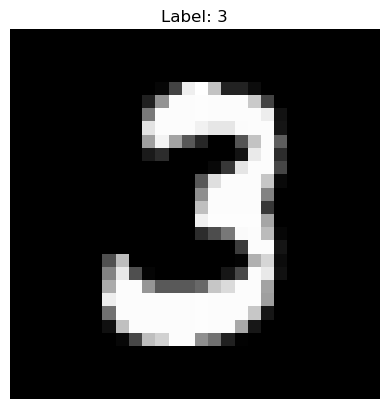

In [2]:
# Choose a random index
print(X.shape)
random_index = np.random.randint(0, X.shape[0])

# Reshape the 784-pixel data to a 28x28 image
image = X[random_index].reshape(28, 28)

# Get the corresponding label
label = y[random_index]

# Plot the image with its label
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


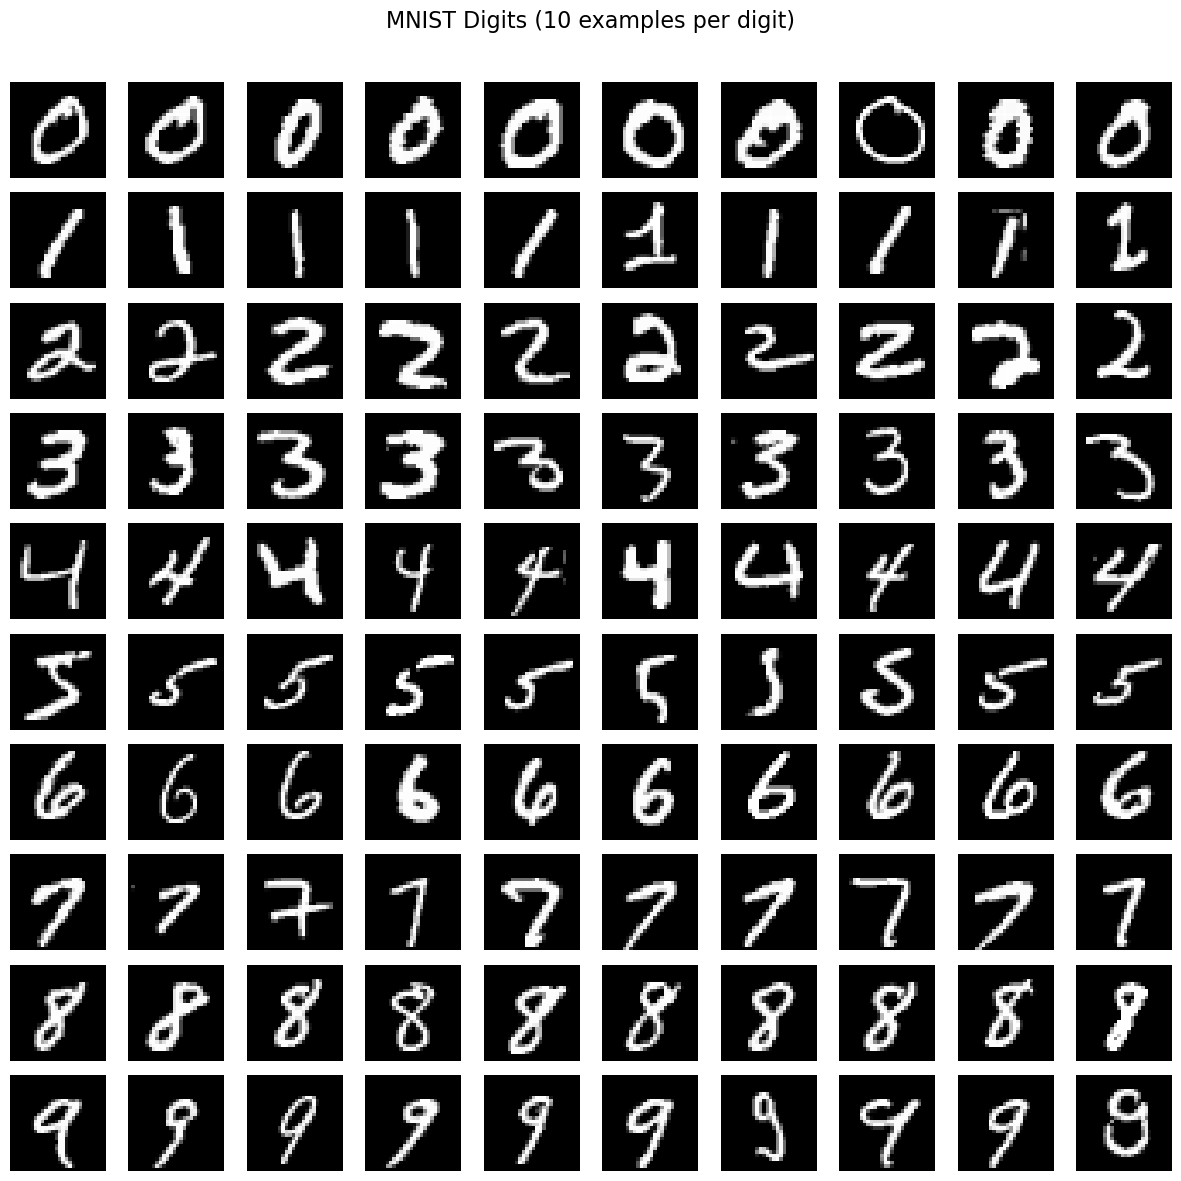

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml



# Set up a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("MNIST Digits (10 examples per digit)", fontsize=16)

# Loop over each digit (0 to 9)
for digit in range(10):
    # Filter out images for the current digit
    digit_images = X[y == digit]
    
    # Loop over the 10 columns to plot examples of the current digit
    for i in range(10):
        # Select the image and reshape to 28x28
        image = digit_images[i].reshape(28, 28)
        
        # Plot the image in the corresponding subplot
        ax = axes[digit, i]
        ax.imshow(image, cmap="gray")
        ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [4]:
def load_two_classes(X, y, digit1, digit2, num_train=1000, num_test=1000):
    """
    Filter MNIST data for two specified digits and split into train and test sets.
    
    Parameters:
    - X: np.array, feature data for all samples (e.g., from MNIST)
    - y: np.array, target labels for all samples (e.g., from MNIST)
    - digit1: int, first digit to filter (0-9)
    - digit2: int, second digit to filter (0-9)
    - num_train: int, number of samples to return in the training set (default: 1000)
    - num_test: int, number of samples to return in the test set (default: 1000)
    
    Returns:
    - X_train, y_train: training data and labels
    - X_test, y_test: test data and labels
    """
    # Filter the data for the specified digits
    filter_mask = (y == digit1) | (y == digit2)
    X_filtered = X[filter_mask]
    y_filtered = y[filter_mask]
    
    # Re-label y to binary (0 for digit1, 1 for digit2)
    y_binary = np.where(y_filtered == digit1, 0, 1)

    # Shuffle and split into training and test sets
    indices = np.random.permutation(len(X_filtered))
    train_indices = indices[:num_train]
    test_indices = indices[num_train:num_train + num_test]
    
    X_train, y_train = X_filtered[train_indices], y_binary[train_indices]
    X_test, y_test = X_filtered[test_indices], y_binary[test_indices]

    return X_train, y_train, X_test, y_test

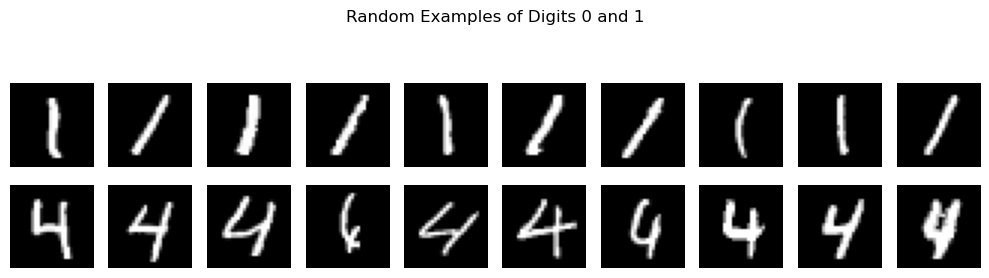

Shapes of the data sets:  (1000, 784) (1000,) (1000, 784) (1000,)


In [5]:
# Use the function to filter digits 0 and 1
X_train, y_train, X_test, y_test = load_two_classes(X, y, 1, 4, num_train=1000, num_test=1000)

# Visualize examples from each class in the training set
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
fig.suptitle("Random Examples of Digits 0 and 1")

# Plot 10 random images for each digit in the training set
for digit in [0, 1]:
    digit_class = 0 if digit == 0 else 1
    digit_indices = np.where(y_train == digit_class)[0]
    selected_indices = np.random.choice(digit_indices, 10, replace=False)
    
    for i, idx in enumerate(selected_indices):
        ax = axes[digit, i]
        ax.imshow(X_train[idx].reshape(28, 28), cmap="gray")
        ax.axis("off")
        if i == 0:
            ax.set_ylabel(f"Digit {digit}")

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

print('Shapes of the data sets: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)


---

## 4.A.2 Activation Function

The sigmoid activation function is a commonly used activation function in neural networks. It maps any input value to an output between $0$ and $1$, making it particularly useful for binary classification tasks. The function is defined by the formula:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where $x$ is the input to the function.

#### Why Use the Sigmoid Function?

1. **Range-Bounded**: The output of the sigmoid function is always between 0 and 1, which makes it useful for probabilities.
2. **Differentiable**: The sigmoid function is smooth and differentiable, allowing us to compute gradients for optimization.
3. **Non-linear**: It introduces non-linearity into the network, enabling the model to learn complex patterns.

#### Derivative of the Sigmoid Function

The derivative of the sigmoid function with respect to its input $x$ is:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

This derivative is crucial in backpropagation, as it helps calculate the gradient of the loss function with respect to the weights in the network.

#### Task: Implement a Sigmoid Activation Function Class

Your goal is to create a class `SigmoidActivationFunction` that implements the sigmoid activation function and its derivative. 

This class should have the following methods:

* `__call__(self, x)`: This method should calculate and return the output of the sigmoid function for a given input $x$.
* `derivative(self, x)`: This method should calculate and return the derivative of the sigmoid function for a given input \( x \).

In addition:

* visualize and plot the sigmoid function and the derivative of the sigmoid (using 'linspace' and consider different ranges);

**Questions**

* What kind of problems or drawbacks could we experience when using a sigmoid function? Where does the computation might become difficult?
* For the derivative: Consider the form of the function -- how does this influence learning when using gradient descent (which is based on the derivative)? 

<details>
    <summary>Hint: Problems of sigmoid activation function</summary>
    <p>Sigmoid functions can lead to **vanishing gradients** when the input values become very large or very small, making the gradients close to zero. In this case, the gradient does not push the learner towards better solutions.</p>
</details>

In [6]:
import numpy as np

class SigmoidActivationFunction:
    """
    A class implementing the sigmoid activation function and its derivative.
    """

    def __call__(self, x):
        """
        Calculate the sigmoid activation function for a given input x.

        Parameters:
        x : np.array or float
            The input value(s) to the sigmoid function.

        Returns:
        np.array or float
            The sigmoid function output for each element in x.
        """
        # TODO: Implement sigmoid function
        # return (x)
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        """
        Calculate the derivative of the sigmoid function for a given input x.

        Parameters:
        x : np.array or float
            The input value(s) to the sigmoid function.

        Returns:
        np.array or float
            The derivative of the sigmoid function for each element in x.
        """
        # TODO: Implement derivative of sigmoid.
        sigmoid_x = self.__call__(x)
        return sigmoid_x * (1 - sigmoid_x)


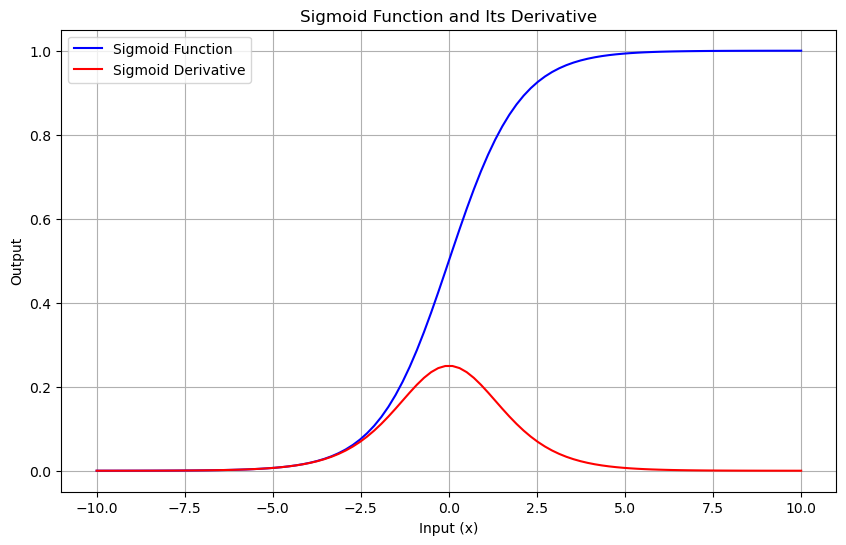

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the SigmoidActivationFunction class
sigmoid_function = SigmoidActivationFunction()

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Use the class to calculate the sigmoid function and its derivative
sigmoid = sigmoid_function(x)
sigmoid_derivative = sigmoid_function.derivative(x)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid, label='Sigmoid Function', color='blue')

# Plot the derivative of the sigmoid function
plt.plot(x, sigmoid_derivative, label='Sigmoid Derivative', color='red')

# Add labels and title
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Sigmoid Function and Its Derivative')
plt.legend()
plt.grid()
plt.show()


---

## 4.A.3 Single Layer Neural Network Model

As a next step, we are now setting up our neural network. The neural network model is a simple, single-layer neural network, also known as a **perceptron**. It consists of two main components:

1. **Weighted Sum**: Each input feature is multiplied by a weight, and the results are summed together along with a bias term. This produces a linear combination of the inputs, which we can think of as a linear regression model.
   
   Mathematically, for an input vector \( X = [x_1, x_2, \dots, x_n] \) and weight vector \( W = [w_1, w_2, \dots, w_n] \), the output before activation, \( z \), is calculated as:
   \[
   z = W \cdot X + b
   \]
   where \( b \) is the bias term.

2. **Activation Function**: After computing the weighted sum, we apply a **non-linear activation function** (in this case, the sigmoid function) to introduce non-linearity into the model. The sigmoid function is defined as:
   \[
   \sigma(z) = \frac{1}{1 + e^{-z}}
   \]
   This activation function maps \( z \) to a value between 0 and 1, making it useful for tasks like binary classification.

**Tasks:**

Your task is to take the given linear regression model and adapt it into a neural network model by introducing an activation function.

* Add the Activation Function: Modify the forward pass of the model to apply the sigmoid activation function after computing the weighted sum.
* Implement Backpropagation with Activation: Update the model’s fitting process by including the derivative of the activation function in the backward pass. This will allow the model to adjust the weights based on the sigmoid-activated output.
* Train your model and measure training and test error. Provide these in a plot.
* **Task B** Implement your `fit` method in a batch fashion, i.e, updating the gradient after seeing a couple (= the batch size) of samples from the training data set.

The goal is to adapt a linear regression model to a neural network with non-linear output, allowing it to learn patterns that a simple linear model cannot capture.

**Further observations:**

Choose different combinations of digits for the two classes:

* one that should be easy to discriminate,
* one that should be very difficult to discriminate

Why do you consider these easy or difficult? What are the training and test error? You might have to tune the learning parameters again!

### Explanation of Gradient Calculation in the Backward Pass

In a single-layer neural network with sigmoid activation, our goal is to minimize the **Mean Squared Error (MSE)** loss by adjusting the weights using gradient descent. Here’s a breakdown of how we calculate the gradient of the MSE with respect to the weights, applying the chain rule due to the non-linear sigmoid activation, working our way **backwards** through the network and calculation. In a way, for each step in our calculation in the forward pass, we are considering how this has to change in a way that the error is getting smaller (negative gradient is pointing in the direction of smaller errors).

We define:
- $y$ as the true labels
- $\hat{y}$ as the predicted output from the model, after applying the activation function: $\hat{y} = \sigma(z) = \sigma(W \cdot X + b )$
  
where:
  - $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid activation function
  - $z = W \cdot X + b$ represents the linear combination of inputs $X$ with weights $W$ and bias $b$.

To train the model, we need to calculate the gradient of the **MSE loss** with respect to each weight in $W$ (including the bias term $b$).

The **Mean Squared Error** is defined as:
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where $n$ is the number of samples. To minimize this loss, we need to compute the gradient of the MSE with respect to each weight in $W$, which requires the chain rule due to the non-linear sigmoid activation.

### Step-by-Step Gradient Derivation (going backwards through our network)

1. **Gradient of the Activation Function (Sigmoid)**:

   Since our output $\hat{y}$ is computed by applying the sigmoid activation function to $z = W \cdot X + b$, the derivative of $\hat{y} = \sigma(z)$ with respect to $z$ is:
   
   $$
   \frac{d \sigma}{d z} = \sigma(z) \cdot (1 - \sigma(z))
   $$
   
   This derivative, $\sigma(z) \cdot (1 - \sigma(z))$, scales the gradient during backpropagation. It represents how the output of the activation function changes with respect to its input $z$.

2. **Gradient of the MSE with Respect to the Predictions $\hat{y}$**:

   Next, we calculate the gradient of the MSE with respect to $\hat{y}$, our predictions. This is the partial derivative of the MSE loss with respect to each predicted output:
   
   $$
   \frac{\partial \text{MSE}}{\partial \hat{y}} = \frac{2}{n} (\hat{y} - y)
   $$
   
   The factor of 2 can be omitted as we are interested in the direction and relative magnitude of gradients (it is usually simply absorbed into the learning rate), leaving:
   
   $$
   \frac{\partial \text{MSE}}{\partial \hat{y}} = \hat{y} - y
   $$

3. **Applying the Chain Rule**:

   To find the gradient of the MSE with respect to the linear combination $z$ (the input to the sigmoid), we apply the chain rule:
   
   $$
   \frac{\partial \text{MSE}}{\partial z} = \frac{\partial \text{MSE}}{\partial \hat{y}} \cdot \frac{d \hat{y}}{d z}
   $$
   
   Substituting from the previous steps:
   
   $$
   \frac{\partial \text{MSE}}{\partial z} = (\hat{y} - y) \cdot \sigma(z) \cdot (1 - \sigma(z))
   $$
   
   where:
   - $\frac{\partial \text{MSE}}{\partial \hat{y}} = \hat{y} - y$
   - $\frac{d \hat{y}}{d z} = \sigma(z) \cdot (1 - \sigma(z))$

4. **Gradient of the MSE with Respect to the Weights \( W \)**:

   Finally, we need the gradient of the MSE with respect to each weight $w_j \in W$. Using the chain rule again:

   $$
   \frac{\partial \text{MSE}}{\partial W} = \frac{\partial \text{MSE}}{\partial z} \cdot \frac{\partial z}{\partial W}
   $$

   Since $z = W \cdot X + b$, the derivative of $z$ with respect to $W$ is simply $X$. Therefore:

   $$
   \frac{\partial \text{MSE}}{\partial W} = (\hat{y} - y) \cdot \sigma(z) \cdot (1 - \sigma(z)) \cdot X
   $$

   This represents the gradient of the MSE loss with respect to each weight. By calculating this across all samples and averaging, we obtain the mean gradient, which can then be used to update the weights during gradient descent.


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error

class SingleLayerNeuralNetwork:
    """
    A simplified neural network model with one layer that performs gradient descent.
    """
    
    def __init__(self, input_dim, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.weights = np.random.rand(1, input_dim + 1) * 0.0001  # Initialize weights with input dimension (+1 for bias)
        self.mse_history = []  # List to store MSE at each iteration
        self.activation_function = SigmoidActivationFunction()  # Use the SigmoidActivationFunction class

    def add_bias_column(self, X):
        """
        Add a bias column (of ones) to the input data.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
            
        Returns:
        X_with_bias : np.array, shape (n_samples, input_dim + 1)
            The input with an added bias column.
        """
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return X_with_bias

    def forward(self, X):
        """
        Perform the forward pass through the single layer.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
            
        Returns:
        layer_output : np.array
            Output of the layer after applying the activation function.
        """
        layer_input = np.dot(X, self.weights.T)
        layer_output = self.activation_function(layer_input)  # Use the activation function class
        return layer_output
    
    def predict(self, X):
        """
        Make predictions using the trained model.
        """
        X_with_bias = self.add_bias_column(X)  # Add bias column
        return self.forward(X_with_bias)

    def fit(self, X, y):
        """
        Fit the model using gradient descent, adjusting weights iteratively.
        """
        y = y.reshape(-1, 1)  # Ensure y is a column vector (n_samples, 1)
        X_with_bias = self.add_bias_column(X)
        for _ in range(self.n_iterations):    
            # Use the forward pass to get the predictions
            layer_output = self.forward(X_with_bias)

            # Calculate Mean Squared Error and store it
            mse = mean_squared_error(y, layer_output)
            self.mse_history.append(mse)
            
            # Backward pass: calculate the gradient for the weights
            layer_input = np.dot(X_with_bias, self.weights.T)  # Linear combination
            delta = (layer_output - y) * self.activation_function.derivative(layer_input)

            # Compute the gradient of the weights (nabla), averaged across the batch
            gradient = np.dot(delta.T, X_with_bias) / X.shape[0]

            # Update weights by moving in the direction of the negative gradient
            self.weights -= self.learning_rate * gradient

    
    def fit_batch(self, X, y, batch_size=32):
        """
        Fit the model using mini-batch gradient descent with specified batch size.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
        y : np.array, shape (n_samples,)
            The true target values.
        batch_size : int
            The size of each mini-batch for training (default is 32).
        """
        y = y.reshape(-1, 1)  # Ensure y is a column vector (n_samples, 1)
        X_with_bias = self.add_bias_column(X)  # Add bias column to the input data
        
        n_samples = X.shape[0]
        for _ in range(self.n_iterations):
            # Shuffle the data at the beginning of each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X_with_bias[indices]
            y_shuffled = y[indices]
            
            # Process each mini-batch
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Forward pass: calculate predictions
                layer_output = self.forward(X_batch)

                # Backward pass: calculate the gradient for the weights
                layer_input = np.dot(X_batch, self.weights.T)  # Linear combination
                delta = (layer_output - y_batch) * self.activation_function.derivative(layer_input)
                
                # Compute the gradient, averaged over the mini-batch
                gradient = np.dot(delta.T, X_batch) / X_batch.shape[0]
                
                # Update weights
                self.weights -= self.learning_rate * gradient
            
            # Calculate Mean Squared Error over the entire dataset for monitoring
            epoch_output = self.forward(X_with_bias)
            mse = mean_squared_error(y, epoch_output)
            self.mse_history.append(mse)

    def get_mse_history(self):
        """
        Get the history of MSE values during training.
        """
        return self.mse_history


/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056

Accuracy on test set (standard): 99.20%
Accuracy on test set (batch): 99.30%


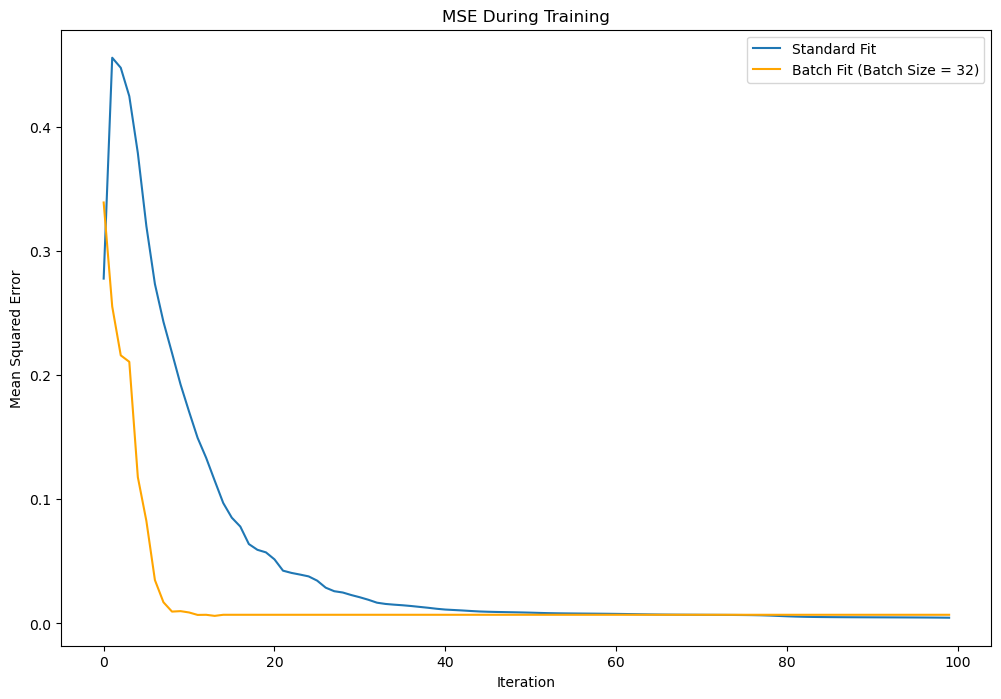

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize and train the SimpleNeuralNetwork model
input_dim = X_train.shape[1]
model = SingleLayerNeuralNetwork(input_dim=input_dim, learning_rate=0.001, n_iterations=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Initialize and train the model with mini-batch fit method
model_batch = SingleLayerNeuralNetwork(input_dim=input_dim, learning_rate=0.01, n_iterations=100)
model_batch.fit_batch(X_train, y_train, batch_size=32)  # Using a batch size of 32
# Make predictions on the test set using the batch model
y_pred_batch = model_batch.predict(X_test)
y_pred_batch = (y_pred_batch > 0.5).astype(int)
accuracy_batch = accuracy_score(y_test, y_pred_batch)

print(f"Accuracy on test set (standard): {accuracy * 100:.2f}%")
print(f"Accuracy on test set (batch): {accuracy_batch * 100:.2f}%")

# Plot MSE history for both models
plt.figure(figsize=(12, 8))

# Plot MSE for the standard fit method
plt.plot(model.get_mse_history(), label="Standard Fit")

# Plot MSE for the batch fit method
plt.plot(model_batch.get_mse_history(), label="Batch Fit (Batch Size = 32)", color="orange")

plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE During Training")
plt.show()


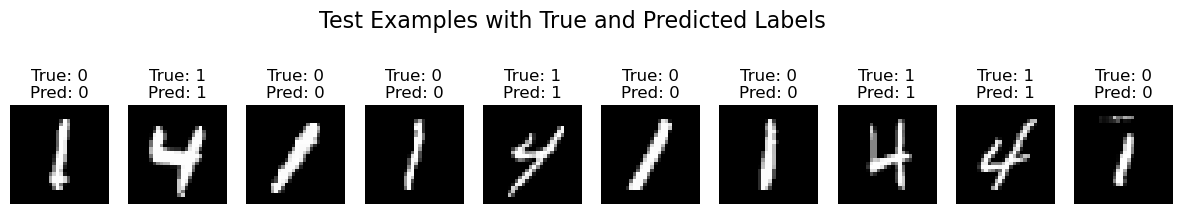

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Number of examples to display
num_examples = 10

# Select random indices from the test set
random_indices = np.random.choice(len(X_test), num_examples, replace=False)

# Get the selected test images, true labels, and predictions
selected_images = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = (model.predict(selected_images) > 0.5).astype(int)

# Plot the examples
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
fig.suptitle("Test Examples with True and Predicted Labels", fontsize=16)

for i, ax in enumerate(axes):
    # Reshape the image to 28x28 for display
    ax.imshow(selected_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i][0]}")

plt.show()


---


## 4.A.4 Understanding Unbalanced Data Sets

An **unbalanced data set** occurs when the classes in the data are not represented equally. For example, in our binary classification problem, if one class significantly outnumbers the other, the data set is said to be unbalanced. This imbalance can create challenges in training machine learning models because the model may become biased toward the more frequent class, potentially leading to poor performance on the underrepresented class.

Your Task is to create an unbalanced data set and train our model on this unbalanced data set. Afterwards, you should analyse how this impacts behavior of the model

**Tasks:**

1. **Data Preparation**:
   - Choose two digits from the MNIST data set, such as **0 and 1** (for a simpler task) or **1 and 4** (for a slightly more challenging one).
   - Create an unbalanced data set with 1000 examples of one digit (majority class) and only 100 examples of the other digit (minority class).

2. **Training and Evaluation**:
   - Train a classifier on this unbalanced data set, using the simple neural network.
   - Calculate accuracy and take again a look at examples.

This task will help you understand the effects of unbalanced data on model training and how to assess model performance accurately in such situations.


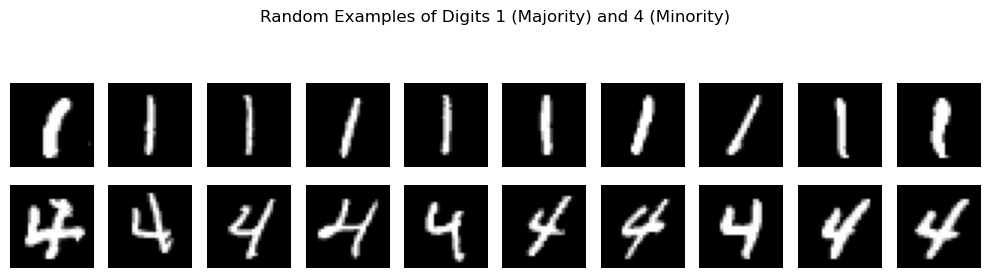

Shapes of the data sets:  (1100, 784) (1100,) (1000, 784) (1000,)


In [11]:
def load_two_classes_unbalanced(X, y, digit1, digit2, num_train_majority=1000, num_train_minority=100, num_test=1000):
    """
    Filter MNIST data for two specified digits and split into an unbalanced train and balanced test set.
    
    Parameters:
    - X: np.array, feature data for all samples (e.g., from MNIST)
    - y: np.array, target labels for all samples (e.g., from MNIST)
    - digit1: int, first digit to filter (0-9), will be the majority class
    - digit2: int, second digit to filter (0-9), will be the minority class
    - num_train_majority: int, number of samples for the majority class in the training set
    - num_train_minority: int, number of samples for the minority class in the training set
    - num_test: int, total number of samples to return in the test set (balanced across both classes)
    
    Returns:
    - X_train, y_train: unbalanced training data and labels
    - X_test, y_test: balanced test data and labels
    """
    # Filter data for the specified digits
    majority_mask = (y == digit1)
    minority_mask = (y == digit2)
    
    X_majority, y_majority = X[majority_mask], y[majority_mask]
    X_minority, y_minority = X[minority_mask], y[minority_mask]
    
    # Relabel y to binary (0 for digit1, 1 for digit2)
    y_majority_binary = np.zeros(len(y_majority), dtype=int)
    y_minority_binary = np.ones(len(y_minority), dtype=int)
    
    # Shuffle and split majority and minority sets for training
    majority_indices = np.random.permutation(len(X_majority))[:num_train_majority]
    minority_indices = np.random.permutation(len(X_minority))[:num_train_minority]
    
    X_train = np.concatenate([X_majority[majority_indices], X_minority[minority_indices]], axis=0)
    y_train = np.concatenate([y_majority_binary[majority_indices], y_minority_binary[minority_indices]], axis=0)
    
    # Shuffle training set
    train_indices = np.random.permutation(len(X_train))
    X_train, y_train = X_train[train_indices], y_train[train_indices]
    
    # Sample a balanced test set
    num_test_per_class = num_test // 2
    X_test_majority = X_majority[np.random.permutation(len(X_majority))[:num_test_per_class]]
    X_test_minority = X_minority[np.random.permutation(len(X_minority))[:num_test_per_class]]
    
    X_test = np.concatenate([X_test_majority, X_test_minority], axis=0)
    y_test = np.concatenate([np.zeros(len(X_test_majority)), np.ones(len(X_test_minority))], axis=0)
    
    return X_train, y_train, X_test, y_test

# Use the function to filter digits 1 and 4, creating an unbalanced training set
X_train, y_train, X_test, y_test = load_two_classes_unbalanced(X, y, 1, 4, num_train_majority=1000, num_train_minority=100, num_test=1000)

# Visualize examples from each class in the training set
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(10, 3))
fig.suptitle("Random Examples of Digits 1 (Majority) and 4 (Minority)")

# Plot 10 random images for each digit in the training set
for digit in [1, 4]:
    digit_class = 0 if digit == 1 else 1
    digit_indices = np.where(y_train == digit_class)[0]
    selected_indices = np.random.choice(digit_indices, 10, replace=False)
    
    for i, idx in enumerate(selected_indices):
        ax = axes[0 if digit == 1 else 1, i]
        ax.imshow(X_train[idx].reshape(28, 28), cmap="gray")
        ax.axis("off")
        if i == 0:
            ax.set_ylabel(f"Digit {digit}")

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

print('Shapes of the data sets: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Accuracy on test set: 50.00%
Accuracy on training set: 90.91%


/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056/872611392.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/pw/l_7t7sfx4lsb_xpf5l41vdk40000gn/T/ipykernel_82056

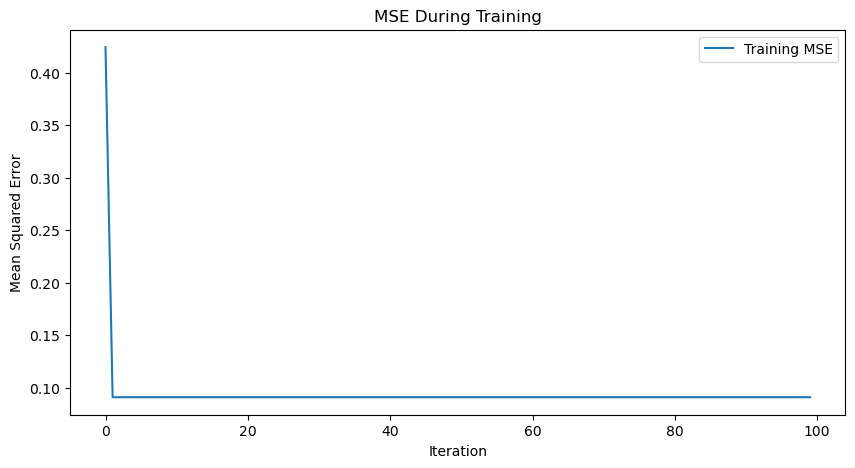

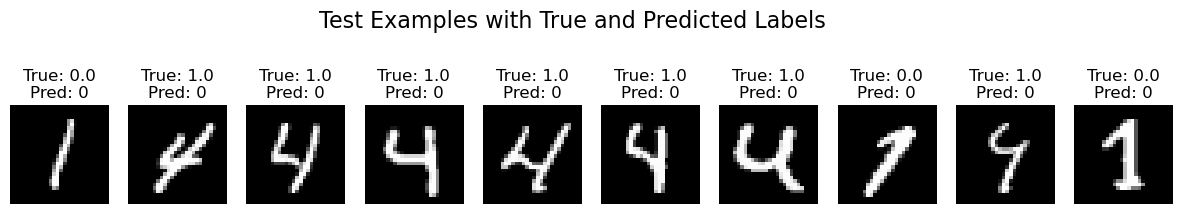

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize and train the SingleLayerNeuralNetwork model
input_dim = X_train.shape[1]
model = SingleLayerNeuralNetwork(input_dim=input_dim, learning_rate=0.01, n_iterations=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels
y_pred_train = model.predict(X_train)
y_pred_train_binary = (y_pred_train > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%")
print(f"Accuracy on training set: {accuracy_train * 100:.2f}%")

# Plot MSE history for the model
plt.figure(figsize=(10, 5))
plt.plot(model.get_mse_history(), label="Training MSE")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE During Training")
plt.legend()
plt.show()

# Display 10 random examples from the test set with true and predicted labels
num_examples = 10
random_indices = np.random.choice(len(X_test), num_examples, replace=False)

# Get the selected test images, true labels, and predictions
selected_images = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = y_pred_train_binary[random_indices]

# Plot the examples
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
fig.suptitle("Test Examples with True and Predicted Labels", fontsize=16)

for i, ax in enumerate(axes):
    # Reshape the image to 28x28 for display
    ax.imshow(selected_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i][0]}")

plt.show()


When dealing with unbalanced data:
1. **Accuracy can be misleading**: The model may achieve high accuracy by simply predicting the majority class more often, even if it performs poorly on the minority class.
2. **Evaluation Metrics**: Metrics like precision, recall, F1-score, and area under the ROC curve (AUC) are often better suited than accuracy to measure model performance on unbalanced data.
3. **Strategies**: Techniques such as re-sampling, using class weights, or balancing algorithms can help mitigate the imbalance, but it’s important to understand the underlying challenge first.

**Tasks:**

* For a better understanding how the model fails, have a look at a confusion matrix (computed below). What does the model actually do when trained on an unbalanced data set?
* Calculate the other mentioned metrics: precision, recall, F1-score. 
   * Understand what these mean, see [sklearn documentation](https://scikit-learn.org/1.5/auto_examples/model_selection/plot_precision_recall.html) and for [F1](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html). What is your expectation for the bad model from above? How will these values look?
   * Compute the values on the test set.

**Analysis**:
   - Examine the classifier’s performance and discuss how the unbalanced data impacts the results.
   - Consider ways to adjust the model or data to improve performance on the minority class (e.g., by using class weights, oversampling, or undersampling techniques).

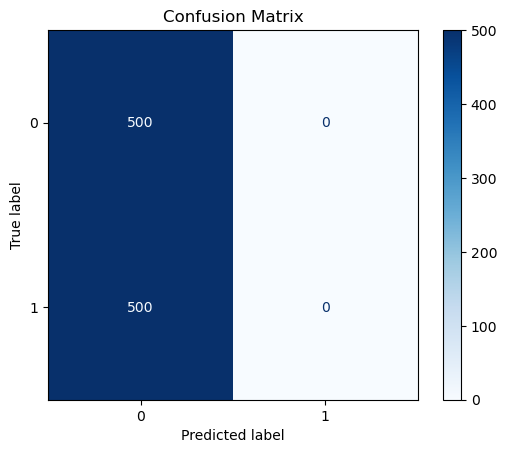

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix: On the test and train set. 
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(y_test.shape, y_pred.shape)
# Calculate precision, recall, and F1-score on the test set
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print(f"Precision on test set: ", precision)
print(f"Recall on test set: ", recall)
print(f"F1-score on test set: ", f1)

(1000,) (1000, 1)
Precision on test set:  [0.5 0. ]
Recall on test set:  [1. 0.]
F1-score on test set:  [0.66666667 0.        ]


/Users/mschilling/miniforge3/envs/py_38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 30.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>